In [15]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
race_x = pd.read_pickle("data/race_x.pkl").values
race_y = pd.read_pickle("data/race_y.pkl").values
len(race_y)

57768

In [17]:
print(len(race_x[0]))
print(race_y[0])

29
1.0


In [18]:
# split data into train and test
x_train, x_test, y_train, y_test = train_test_split(race_x, race_y, train_size=0.7)

In [19]:
def learningModel(dim_1, dim_2, dim_3, batch_size, epochs):
    n_in = len(race_x[0])  # 入力層のニューロン数：　特徴量の数
    n_out = 1 # 出力層のニューロン数： 二値分類なので１

    # 入力層、中間層、出力層の３層のニューラルネットワークを構築する
    model = Sequential()

    #中間層を追加する。最初に層を追加するときはinput_shapeを設定すること。
    #input_shapeのところには形状を入れるため
    # 活性化関数にrelu関数
    model.add(Dense(dim_1, input_dim=n_in, activation="relu"))
    model.add(Dense(dim_2, input_dim=dim_1, activation="relu"))
    model.add(Dense(dim_3, input_dim=dim_2, activation="relu"))

    #出力層を追加する
    model.add(Dense(n_out, activation="sigmoid"))  

    # 損失関数にクロスエントロピー誤差、最適化アルゴリズムにRMSpropを使用する
    model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])  

    #学習開始
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)
    score, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size)
    print("Test score", score)
    print("Test accuracy", accuracy)
    return [model, history, score, accuracy]

In [20]:
model, history, score, accuracy = learningModel(20, 17, 19, 128, 20)

Epoch 1/20
316/316 [==============================] - 1s 495us/step - loss: 0.6108 - accuracy: 0.6708
Epoch 2/20
316/316 [==============================] - 0s 476us/step - loss: 0.5853 - accuracy: 0.6948
Epoch 3/20
316/316 [==============================] - 0s 477us/step - loss: 0.5844 - accuracy: 0.6964
Epoch 4/20
316/316 [==============================] - 0s 502us/step - loss: 0.5836 - accuracy: 0.6969
Epoch 5/20
316/316 [==============================] - 0s 501us/step - loss: 0.5831 - accuracy: 0.6960
Epoch 6/20
316/316 [==============================] - 0s 491us/step - loss: 0.5826 - accuracy: 0.6986
Epoch 7/20
316/316 [==============================] - 0s 477us/step - loss: 0.5825 - accuracy: 0.6990
Epoch 8/20
316/316 [==============================] - 0s 483us/step - loss: 0.5822 - accuracy: 0.6986
Epoch 9/20
316/316 [==============================] - 0s 476us/step - loss: 0.5820 - accuracy: 0.6988
Epoch 10/20
316/316 [==============================] - 0s 479us/step - loss: 0.581

In [21]:
def plot_history(history):
    #精度の履歴をプロット
    plt.plot(history.history["accuracy"], "o-", label="acc")
    plt.title("model_accuracy")
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.legend(loc="lower right")
    plt.show()
    
    #損失の履歴をプロット
    plt.plot(history.history["loss"], "o-", label="loss")
    plt.title("model_loss")
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.legend(loc="lower right")
    plt.show()

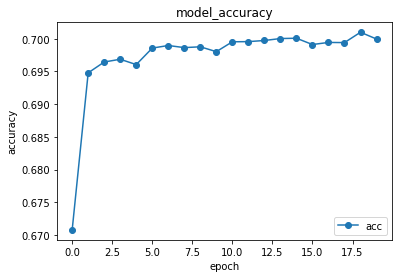

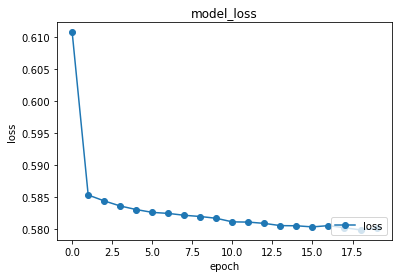

In [22]:
plot_history(history)

In [23]:
y_pred = model.predict(x_test)
print(y_pred[0])

[0.43263176]


In [24]:
#予測値を二値に変換する関数
def toBinary(x):
    if x >= 0.50:
        x = 1
    else:
        x = 0
    return x

In [25]:
y_pred = np.apply_along_axis(lambda x: toBinary(x), 1, y_pred)

In [26]:
#混同行列を見てみる
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(confusion_matrix)
print("Precision:", precision)
print("Recall", recall)
print("F1Score", f1)
confusion_matrix(y_test, y_pred)

<function confusion_matrix at 0x0000028162F4EDC0>
Precision: 0.6761538461538461
Recall 0.5792040063257775
F1Score 0.6239352640545145


array([[7638, 2105],
       [3193, 4395]], dtype=int64)

In [27]:
#学習モデルを保存
model.save("pred_top3")

INFO:tensorflow:Assets written to: pred_top3\assets
